In [1]:
import numpy as np
import matplotlib.pyplot as plt
import FDTD_1D

In [2]:
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2 / (2 * sigma ** 2))

def modulated_gaussian(x, a, x0, sigma, f):
    return np.cos(2*np.pi*f*x) * gaussian(x, a, x0, sigma)

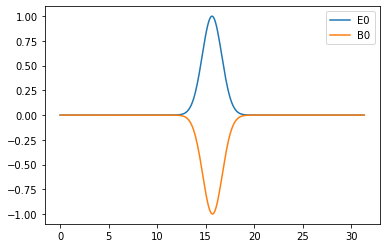

In [3]:
k = 1
omega = 1
L = 10 * np.pi
nx = 300
dx = L / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
dt = 0.95*dx
# E_0 = np.sin(k*x + omega * dt / 2) # t = -dt / 2
# B_0 = np.sin(k*x)
E_0 = gaussian(x, 1, 5*np.pi - dt / 2, 1)
B_0 = - gaussian(x1, 1, 5*np.pi, 1)
# B_0 = np.zeros_like(x1)
# E_0 = np.sin((x - dt / 2))
# B_0 = - np.sin(x1)

plt.plot(x, E_0, label='E0')
plt.plot(x1, B_0, label='B0')
plt.legend()
plt.show()

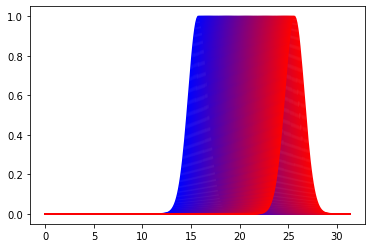

In [4]:
step = 100
E_history = []
B_history = []
for i in range(step):
    E_0, B_0 = FDTD_1D.field_evolve_vacuum(E_0, B_0, dx, dt)
    E_history.append(E_0)
    B_history.append(B_0)
    plt.plot(x, E_0, c=(i/step,0,1-i/step))
plt.show()

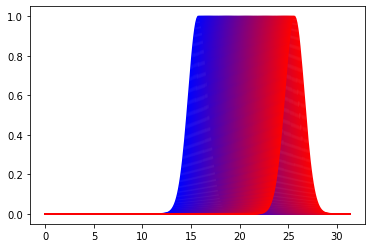

In [5]:
# test the medium function works just as well for vacuum

E_0 = gaussian(x, 1, 5*np.pi - dt / 2, 1)
B_0 = - gaussian(x1, 1, 5*np.pi, 1)
J_0 = np.zeros_like(x)

Omega_p = np.zeros_like(x)
nu = np.zeros_like(x)

step = 100
E_history = []
B_history = []
# plt.plot(x, Omega_p / omega_p, c='black')
for i in range(step):
    E_0, B_0, J = FDTD_1D.field_evolve_medium(E_0, B_0, J_0, Omega_p, nu, dx, dt)
    E_history.append(E_0)
    B_history.append(B_0)
    plt.plot(x, E_0, c=(i/step,0,1-i/step))
# plt.plot(x, E_0)
plt.show()

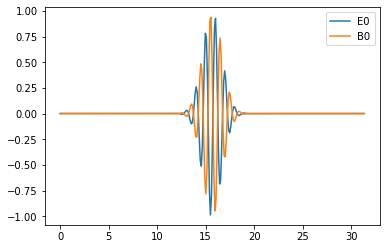

In [6]:
E_0 = modulated_gaussian(x, 1, 5*np.pi - dt / 2, 1, 1)
B_0 = - modulated_gaussian(x1, 1, 5*np.pi, 1, 1)
plt.plot(x, E_0, label='E0')
plt.plot(x1, B_0, label='B0')
plt.legend()
plt.show()

In [51]:
# now test the medium case

Omega_p = np.zeros_like(x)
start = int(nx * 0.75)
stop = int(nx * 0.9)
omega_p = 0.5
medium_range = slice(int(nx * 0.75), int(nx * 0.9))
Omega_p[start:stop] += omega_p
Omega_p[start] = omega_p / 2
Omega_p[stop] = omega_p / 2
nu = np.zeros_like(x)

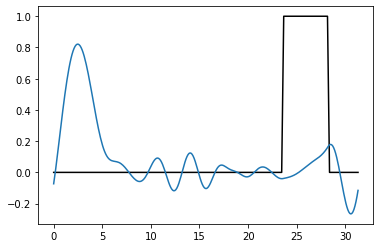

In [52]:
step = 1000
E_history = []
B_history = []
E_0 = gaussian(x, 1, 5*np.pi - dt / 2, 1)
B_0 = - gaussian(x1, 1, 5*np.pi, 1)
# E_0 = modulated_gaussian(x, 1, 5*np.pi - dt / 2, 0.5, 1)
# B_0 = - modulated_gaussian(x1, 1, 5*np.pi, 0.5, 1)
J_0 = np.zeros_like(x)
plt.plot(x, Omega_p / omega_p, c='black')
for i in range(step):
    E_0, B_0, J = FDTD_1D.field_evolve_medium(E_0, B_0, J_0, Omega_p, nu, dx, dt)
    E_history.append(E_0.copy())
    B_history.append(B_0.copy())
    # plot full history mode
    # plt.plot(x, E_0, c=(i/step,0,1-i/step))

# plot final state mode
plt.plot(x, E_0)

plt.show()

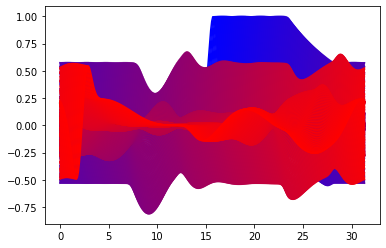

In [9]:
for i, E in enumerate(E_history):
    plt.plot(x, E, c=(i/step,0,1-i/step))

plt.show()

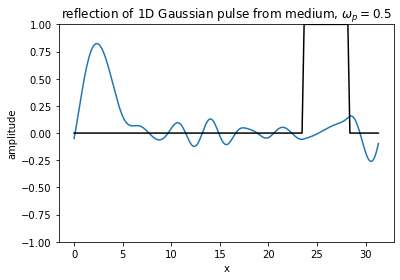

In [53]:
# let's make an animation!
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot(x, E_history[0])
ax.plot(x, Omega_p / omega_p, c='black')
ax.set(ylim=[-1, 1], xlabel='x', ylabel='amplitude')
ax.set_title(rf'reflection of 1D Gaussian pulse from medium, $\omega_p={omega_p}$')

def update(frame):
    line.set_ydata(E_history[frame])
    return line,

ani = animation.FuncAnimation(fig=fig, func=update, frames=999, interval=30)
# plt.show()

ani.save("movie_2.mp4")

c:\Users\Astral\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


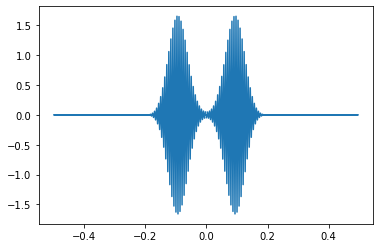

In [48]:
E_fft = np.fft.fft(gaussian(x, 1, 5*np.pi - dt / 2, 0.5))
E_fft_mod = np.fft.fft(modulated_gaussian(x, 1, 5*np.pi - dt / 2, 0.5, 1))
freq = np.fft.fftfreq(len(E_fft_mod))
plt.plot(freq, E_fft_mod)
plt.show()